SVM
Método robusto, con una base matemática muy fuerte
Aborda el idea de hiperplanos de separación con margen máximo
Usa elementos del dataset como vectores de soporte para maximizar el margen
Brinda buena generalización y mitiga los problemas del overfitting
Utiliza multiplicadores de Lagrange para el problema de optimización con restricciones
Usa funciones kernel para problemas linealmente no separables

Ejemplo 1

Precisión en el conjunto de prueba: 0.95


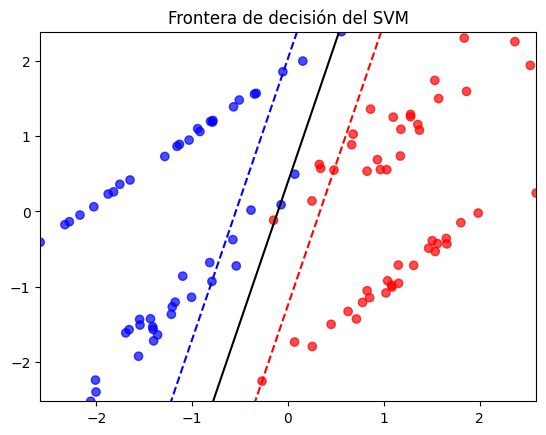

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos sintéticos
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
y[y == 0] = -1  # Convertir etiquetas a -1 y 1

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predicciones y precisión
y_pred = svm.predict(X_test)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

# Visualizar frontera de decisión
def plot_svm_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha=0.7)
    
    # Crear una malla para visualizar la frontera
    xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100),
                         np.linspace(X[:,1].min(), X[:,1].max(), 100))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    plt.title("Frontera de decisión del SVM")
    plt.show()

plot_svm_boundary(svm, X, y)


Ejemplo 2: Clasificación con SVM y Kernel RBF

Precisión con Kernel RBF: 0.975


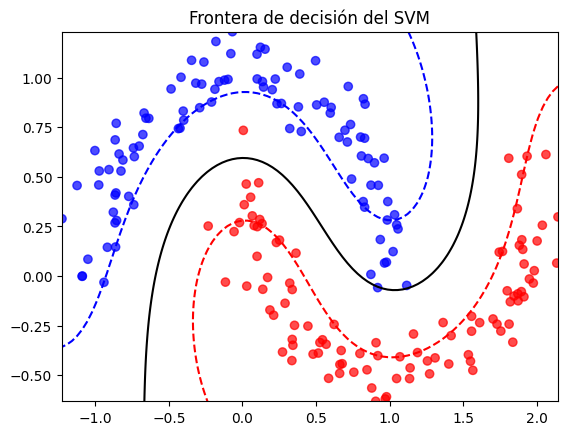

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generar datos con forma no lineal
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predicciones y precisión
y_pred_rbf = svm_rbf.predict(X_test)
print("Precisión con Kernel RBF:", accuracy_score(y_test, y_pred_rbf))

# Visualizar frontera de decisión
plot_svm_boundary(svm_rbf, X, y)


Ejemplo 3: SVM para Regresión

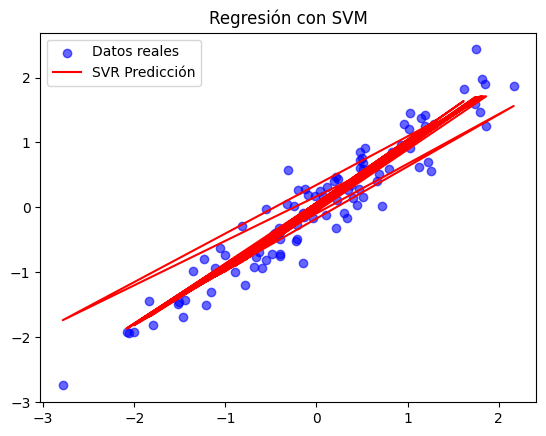

In [3]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generar datos sintéticos de regresión
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Entrenar un SVR con Kernel RBF
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_scaled, y_scaled)

# Predicción
y_pred_svr = svr.predict(X_scaled)

# Graficar resultados
plt.scatter(X_scaled, y_scaled, label="Datos reales", color="blue", alpha=0.6)
plt.plot(X_scaled, y_pred_svr, label="SVR Predicción", color="red")
plt.title("Regresión con SVM")
plt.legend()
plt.show()
